# Build a multinomial logistic model

In [75]:
#import libraries required
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [15]:
#load df into notebook
df = pd.read_csv('../Data/forest_fire_clean.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,4,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,1,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,5,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,4,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,6,0.0,0


In [16]:
#drop redundant columns
df_final = df.drop(columns= ['month','day','area','area_squared_km'], axis=1)

In [17]:
#Drop duplicate values
df_final = df.drop_duplicates()

In [18]:
#Drop all null values (cannot be used in the analysis)
df_final = df_final.dropna(how='any',axis=0) 

In [19]:
#Verify that nf has no null values
df_final.isna().sum()

X                  0
Y                  0
month              0
day                0
FFMC               0
DMC                0
DC                 0
ISI                0
temp               0
RH                 0
wind               0
rain               0
area               0
month_num          0
day_num            0
area_squared_km    0
fire_spread        0
dtype: int64

In [20]:
df_final.shape
#df.shape

(512, 17)

In [21]:
df_final.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,4,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,1,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,5,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,4,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,6,0.0,0


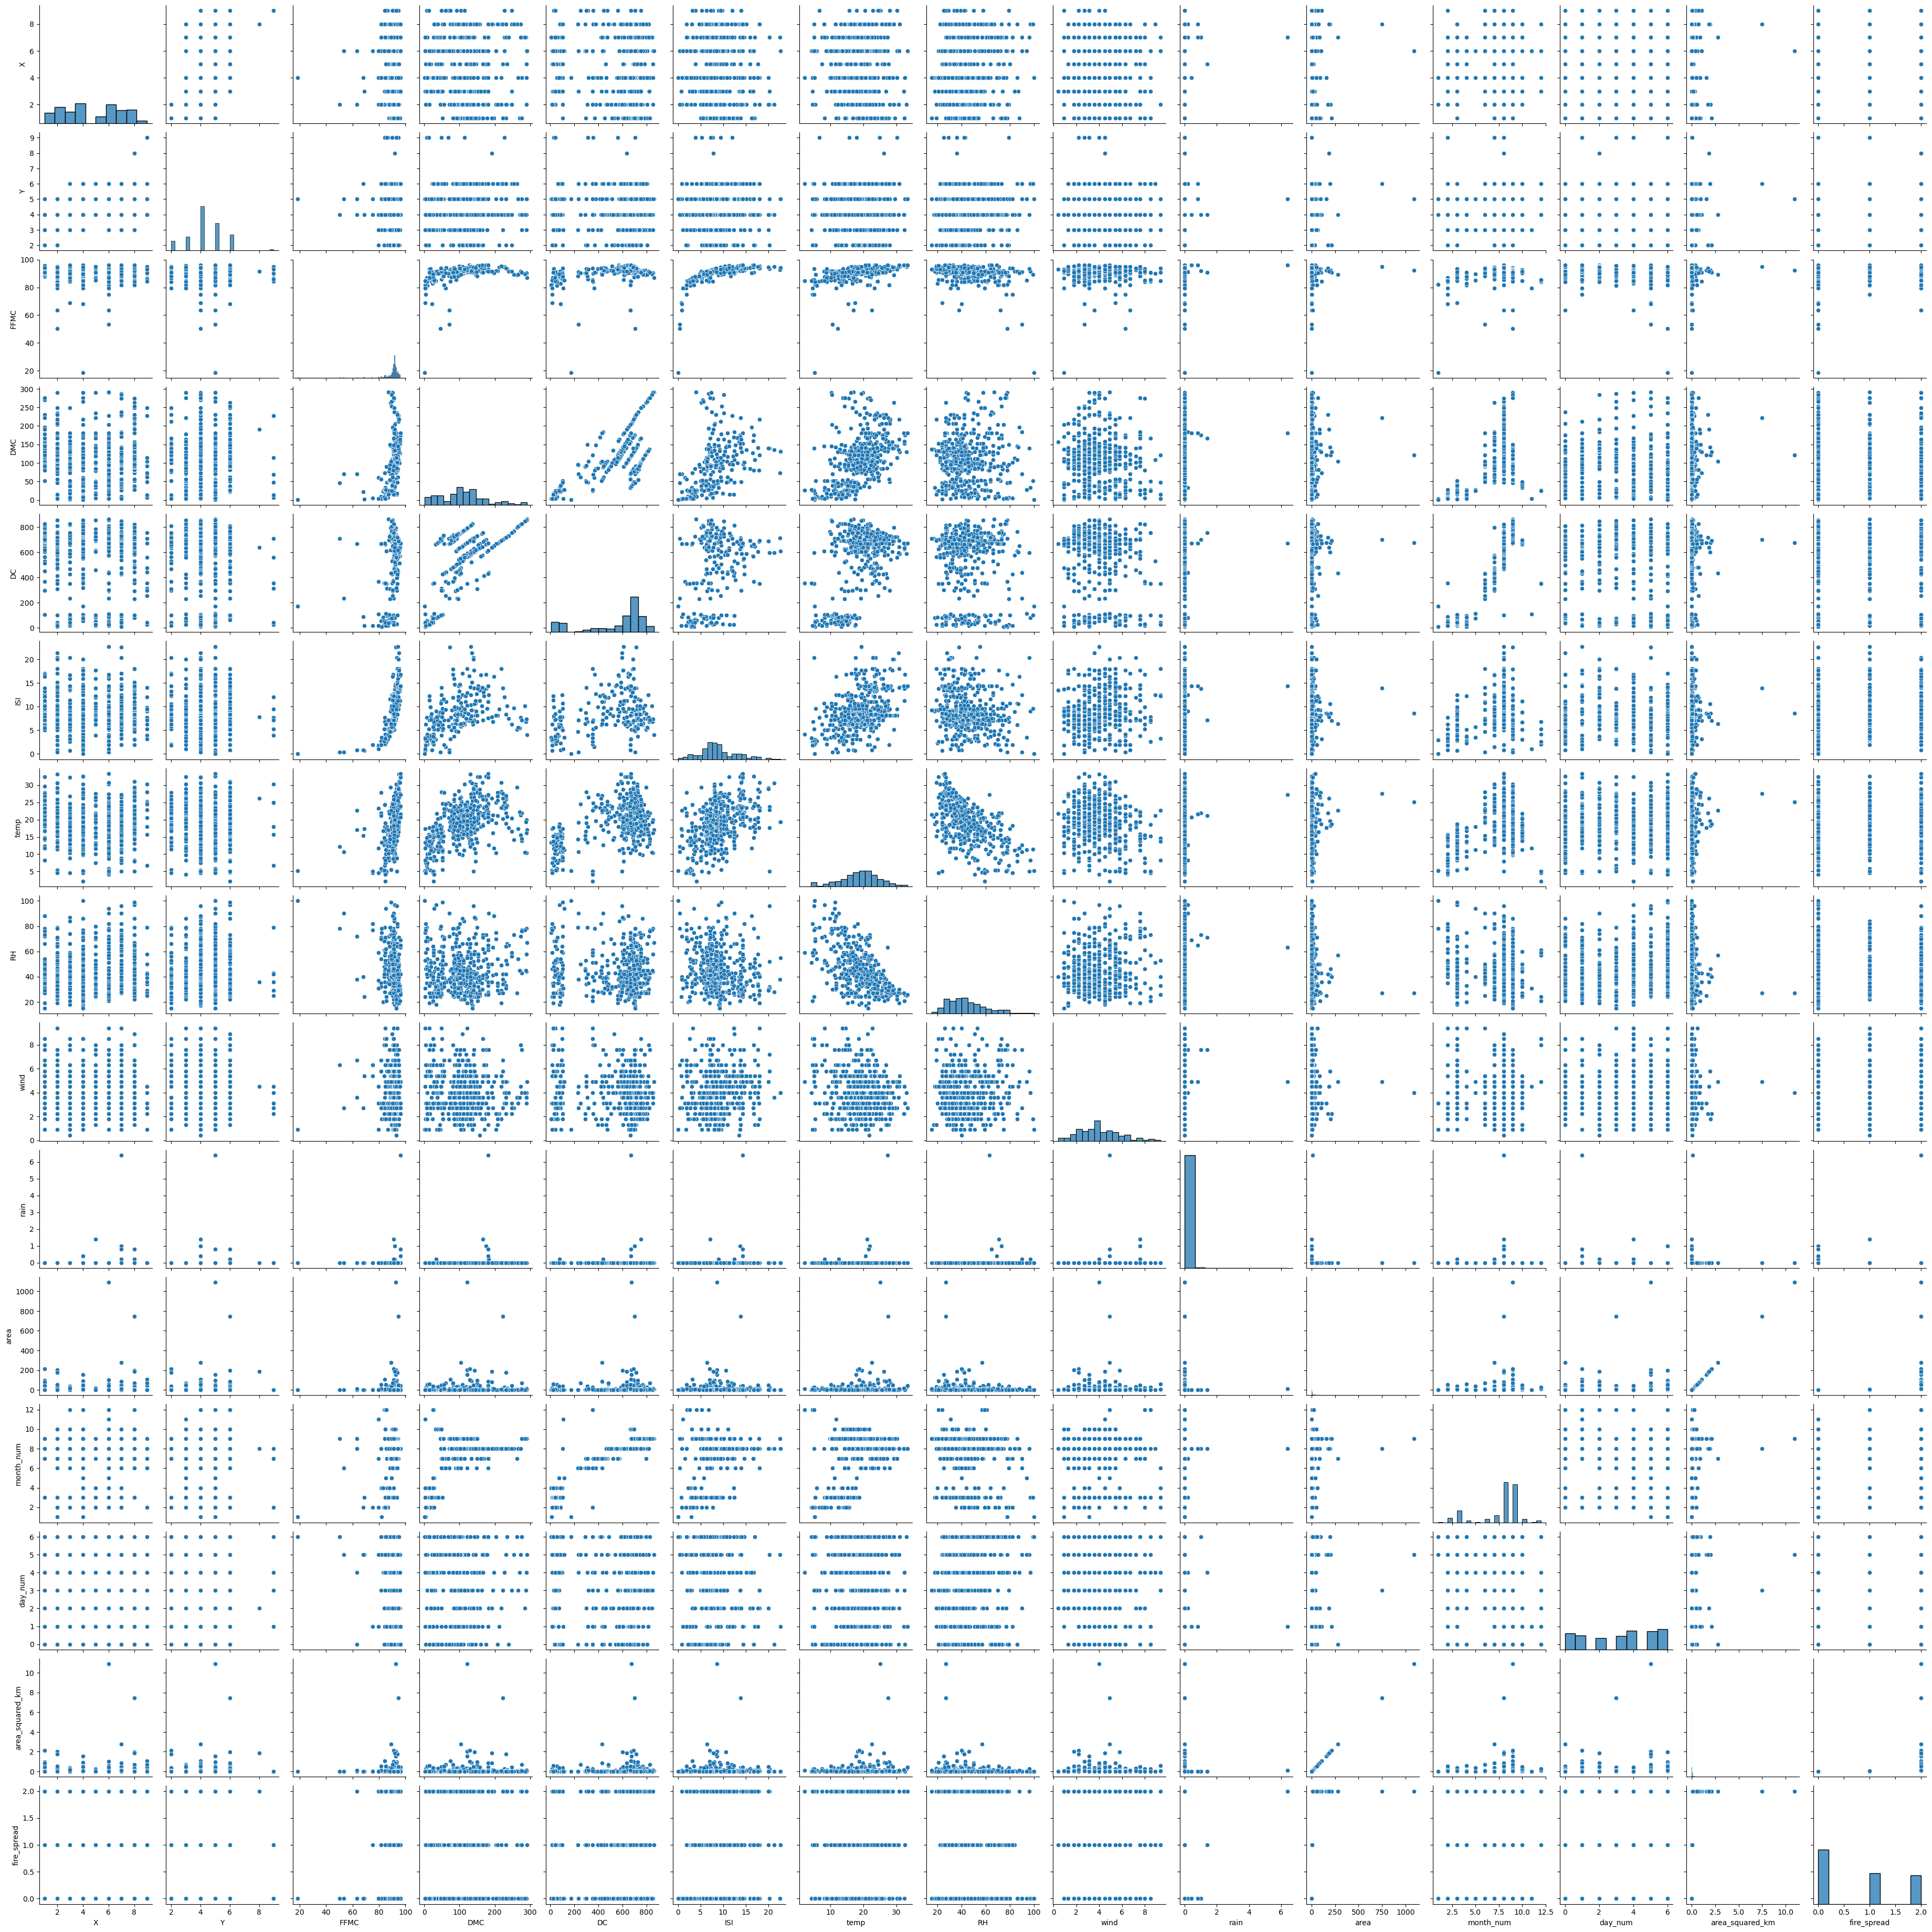

In [22]:


sns.pairplot(data=df_final)
plt.show()

In [23]:
#Finding the correlation 
df_final.corr(numeric_only = True)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
X,1.000000,0.543747,-0.021824,-0.048463,-0.086293,-0.015867,-0.051837,0.083881,0.020357,0.065385,0.063390,-0.065755,-0.025182,0.063390,0.068042
Y,0.543747,1.000000,-0.045686,0.008102,-0.099368,-0.020476,-0.023702,0.062581,-0.019409,0.033280,0.045076,-0.065726,-0.006050,0.045076,0.047385
FFMC,-0.021824,-0.045686,1.000000,0.384121,0.335555,0.582868,0.431380,-0.300928,-0.029576,0.056926,0.040512,0.294521,-0.043413,0.040512,0.059647
DMC,-0.048463,0.008102,0.384121,1.000000,0.682472,0.347262,0.469836,0.071705,-0.105002,0.074751,0.073700,0.464286,0.064707,0.073700,0.045302
DC,-0.086293,-0.099368,0.335555,0.682472,1.000000,0.288681,0.499620,-0.044212,-0.202667,0.035557,0.049856,0.868115,0.007736,0.049856,0.062520
ISI,-0.015867,-0.020476,0.582868,0.347262,0.288681,1.000000,0.434592,-0.149293,0.113819,0.077653,0.014009,0.223406,0.007131,0.014009,0.044385
temp,-0.051837,-0.023702,0.431380,0.469836,0.499620,0.434592,1.000000,-0.528723,-0.227857,0.069588,0.098381,0.369799,0.051904,0.098381,0.038908
RH,0.083881,0.062581,-0.300928,0.071705,-0.044212,-0.149293,-0.528723,1.000000,0.071450,0.099613,-0.075471,-0.100244,0.095444,-0.075471,-0.045208
wind,0.020357,-0.019409,-0.029576,-0.105002,-0.202667,0.113819,-0.227857,0.071450,1.000000,0.061523,0.012808,-0.084853,0.029545,0.012808,0.071429
rain,0.065385,0.033280,0.056926,0.074751,0.035557,0.077653,0.069588,0.099613,0.061523,1.000000,-0.007448,0.013098,-0.048099,-0.007448,0.044033


# Set variables for analysis:
    
Dependent variable(y) = fire_spread <br /> 
Independent variables(x) = X , Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain,month_num, day_num <br /> 

## Bins Created in EDA

fire_spread 1 = minimal spread <br>
fire_spread 2 = moderate spread <br>
fire_spread 3 = large spread <br>

In [24]:
df_final['fire_spread'].value_counts()

0    244
1    139
2    129
Name: fire_spread, dtype: int64

In [25]:
x = df_final[['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','month_num','day_num']] #set x variable
y = df_final['fire_spread'] #set y variable

model = sm.MNLogit(y, x) #set as float values

results = model.fit() #fit the model
print(results.summary())

Optimization terminated successfully.
         Current function value: 1.022677
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:            fire_spread   No. Observations:                  512
Model:                        MNLogit   Df Residuals:                      488
Method:                           MLE   Df Model:                           22
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                 0.03018
Time:                        13:37:50   Log-Likelihood:                -523.61
converged:                       True   LL-Null:                       -539.91
Covariance Type:            nonrobust   LLR p-value:                   0.06789
fire_spread=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
X                 0.0122      0.055      0.220      0.826      -0.096       0.121
Y                 0.

In [29]:
df_large_count=df_final

In [30]:
df_large_count['large_fire_check']=df_large_count['fire_spread']==2

In [31]:
large_fires_by_month=df_large_count.groupby('month')['large_fire_check'].sum()

In [32]:
large_fires_by_month=pd.DataFrame(large_fires_by_month).reset_index()

In [60]:
large_fires_by_month

,month,large_fire_check,rank_count_large_fires
0,apr,2,4.0
1,aug,38,11.0
2,dec,8,8.0
3,feb,5,7.0
4,jan,0,1.0
5,jul,8,9.0
6,jun,3,5.0
7,mar,11,10.0
8,may,1,3.0
9,nov,0,2.0


In [49]:
large_fires_by_month['rank_count_large_fires']=large_fires_by_month['large_fire_check'].rank(method='first')

In [61]:
df_large_count=pd.merge(large_fires_by_month, df_large_count, on='month', how='inner')

In [70]:
df_large_count['F'].unique()

array([0.00389864, 0.07407407, 0.01559454, 0.00974659, 0.        ,
       0.00584795, 0.0214425 , 0.00194932, 0.00779727, 0.09551657])

Create a column F that is the number of large fires in the month divided by the total fires

In [69]:
df_large_count['F']=df_large_count['large_fire_check']/513

In [57]:
df_large_count['rank_count_large_fires'].unique()

array([ 4., 11.,  8.,  7.,  1.,  9.,  5., 10.,  3.,  2.,  6., 12.])

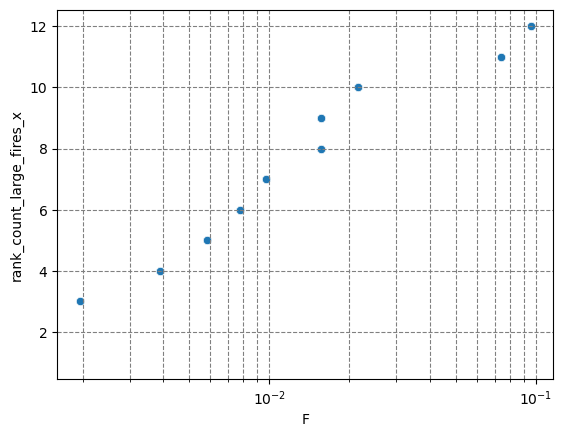

In [71]:
sns.scatterplot(data=df_large_count, x=df_large_count['F'], y=df_large_count['rank_count_large_fires_x'])
plt.xscale('log')
plt.grid(True,which="both",ls="--",c='gray')
plt.show()

Normal: 
t = p + o@-'F(t) = p + az, 
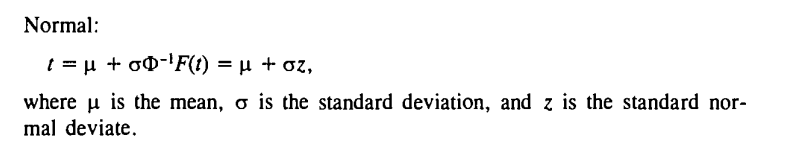where p is the mean, a is the standard deviation, and z is the standard normal deviate

In [76]:
df_large_count['normal_model']=(df_large_count['large_fire_check'].mean())+((df_large_count['large_fire_check'].std())*stats.zscore(df_large_count['large_fire_check']))

In [ ]:
cleaned_data_plus_large_count.drop('normal_modal',axis=1,inplace=True)

In [78]:
df_large_count.head()

,month,large_fire_check,rank_count_large_fires_x,rank_count_large_fires_y,X,Y,day,FFMC,DMC,DC,...,rain,area,month_num,day_num,area_squared_km,fire_spread,large_fire_month_total,large_fire_check_y,F,normal_model
0,apr,2,4.0,4.0,6,4,sat,86.3,27.4,97.1,...,0.0,0.00,4,5,0.0000,0,False,False,0.003899,1.970477
1,apr,2,4.0,4.0,6,5,thu,81.5,9.1,55.2,...,0.0,4.61,4,3,0.0461,1,False,False,0.003899,1.970477
2,apr,2,4.0,4.0,6,5,thu,81.5,9.1,55.2,...,0.0,10.93,4,3,0.1093,2,True,True,0.003899,1.970477
3,apr,2,4.0,4.0,7,5,sun,81.9,3.0,7.9,...,0.0,0.00,4,6,0.0000,0,False,False,0.003899,1.970477
4,apr,2,4.0,4.0,6,3,wed,88.0,17.2,43.5,...,0.0,0.00,4,2,0.0000,0,False,False,0.003899,1.970477


In [79]:
df_large_count['month_z_score']=stats.zscore(df_large_count['large_fire_month_total'])

In [80]:
df_large_count['mean_large_fires']=df_large_count['large_fire_month_total'].mean()
df_large_count['std_large_fires']=df_large_count['large_fire_month_total'].std()

In [81]:
df_large_count.head()

,month,large_fire_check,rank_count_large_fires_x,rank_count_large_fires_y,X,Y,day,FFMC,DMC,DC,...,day_num,area_squared_km,fire_spread,large_fire_month_total,large_fire_check_y,F,normal_model,month_z_score,mean_large_fires,std_large_fires
0,apr,2,4.0,4.0,6,4,sat,86.3,27.4,97.1,...,5,0.0000,0,False,False,0.003899,1.970477,-0.580357,0.251953,0.434559
1,apr,2,4.0,4.0,6,5,thu,81.5,9.1,55.2,...,3,0.0461,1,False,False,0.003899,1.970477,-0.580357,0.251953,0.434559
2,apr,2,4.0,4.0,6,5,thu,81.5,9.1,55.2,...,3,0.1093,2,True,True,0.003899,1.970477,1.723076,0.251953,0.434559
3,apr,2,4.0,4.0,7,5,sun,81.9,3.0,7.9,...,6,0.0000,0,False,False,0.003899,1.970477,-0.580357,0.251953,0.434559
4,apr,2,4.0,4.0,6,3,wed,88.0,17.2,43.5,...,2,0.0000,0,False,False,0.003899,1.970477,-0.580357,0.251953,0.434559


In [82]:
df_large_count['normal_model_F']=df_large_count['normal_model']/513

In [84]:
df_large_count

,month,large_fire_check,rank_count_large_fires_x,rank_count_large_fires_y,X,Y,day,FFMC,DMC,DC,...,area_squared_km,fire_spread,large_fire_month_total,large_fire_check_y,F,normal_model,month_z_score,mean_large_fires,std_large_fires,normal_model_F
0,apr,2,4.0,4.0,6,4,sat,86.3,27.4,97.1,...,0.0000,0,False,False,0.003899,1.970477,-0.580357,0.251953,0.434559,0.003841
1,apr,2,4.0,4.0,6,5,thu,81.5,9.1,55.2,...,0.0461,1,False,False,0.003899,1.970477,-0.580357,0.251953,0.434559,0.003841
2,apr,2,4.0,4.0,6,5,thu,81.5,9.1,55.2,...,0.1093,2,True,True,0.003899,1.970477,1.723076,0.251953,0.434559,0.003841
3,apr,2,4.0,4.0,7,5,sun,81.9,3.0,7.9,...,0.0000,0,False,False,0.003899,1.970477,-0.580357,0.251953,0.434559,0.003841
4,apr,2,4.0,4.0,6,3,wed,88.0,17.2,43.5,...,0.0000,0,False,False,0.003899,1.970477,-0.580357,0.251953,0.434559,0.003841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,sep,49,12.0,12.0,1,3,fri,91.1,91.3,738.1,...,0.0033,1,False,False,0.095517,49.016443,-0.580357,0.251953,0.434559,0.095549
508,sep,49,12.0,12.0,5,4,fri,90.3,290.0,855.3,...,0.0000,0,False,False,0.095517,49.016443,-0.580357,0.251953,0.434559,0.095549
509,sep,49,12.0,12.0,2,5,fri,90.3,290.0,855.3,...,0.0996,2,True,True,0.095517,49.016443,1.723076,0.251953,0.434559,0.095549
510,sep,49,12.0,12.0,7,4,wed,89.7,284.9,844.0,...,0.0000,0,False,False,0.095517,49.016443,-0.580357,0.251953,0.434559,0.095549


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


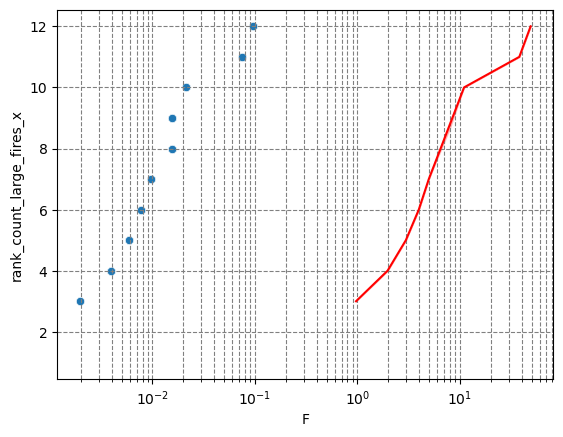

In [87]:


# Scatterplot
sns.scatterplot(data=df_large_count, x='F', y='rank_count_large_fires_x')
plt.xscale('log')
plt.grid(True, which="both", ls="--", c='gray')

# Lineplot using data from 'line_column'
sns.lineplot(data=df_large_count, x='normal_model', y='rank_count_large_fires_x', color='red')

plt.show()


## Important properties of the dataset:
    - variables are only entered when there is a fire
    - We have month variable but not year variable, so we can't look at trends over time
    - If we had the same data for days there were no fires, there would be more questions we could answer

## So what might we predict?
    - how frequent fires are by month/season?
    - Fire size chance of any given fire will be a large fire

## For a variable to predict large fires... 
    - an increase in the variable must increase the size of fires while also not increasing number of small fires...m